In [31]:
!pip install surprise
import surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import matplotlib.pyplot as plt
import seaborn as sns

## **1 - Business Problem**

___Recommend a best book based on the ratings___

## **2 - Data collection and description**

In [ ]:
from google.colab import files
data = files.upload()

Saving book.csv to book.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.StringIO(data['book.csv'].decode('latin1')))

In [ ]:
df1 = df.iloc[:,1:]

In [ ]:
df1.columns = ['userID', 'title', 'bookRating']

In [ ]:
df1.head()

,userID,title,bookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [ ]:
print('# of records: %d\n# of books: %d\n# of users: %d' % (len(df1), len(df1['title'].unique()), len(df1['userID'].unique())))

# of records: 10000
# of books: 9659
# of users: 2182


In [ ]:
palette = sns.color_palette("RdBu", 10)

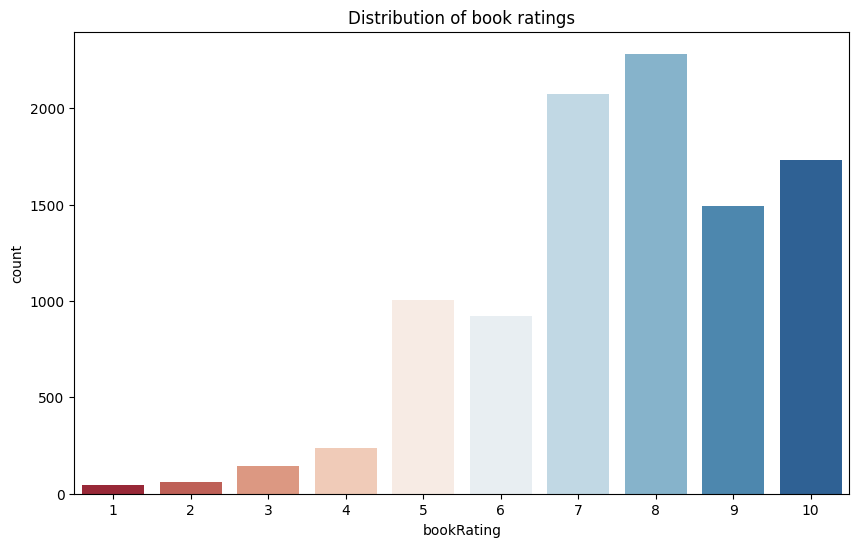

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='bookRating', data=df1, palette=palette)
ax.set_title('Distribution of book ratings')

plt.show()

**The majority of ratings is between 5 and 10. Most often users tend to rate books for 8. Second the most frequent score is 7.**

## **3 - Introduction to "Surprice" Package**

In [ ]:
df1.bookRating.unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [ ]:
reader = surprise.Reader(rating_scale=(1, 10))

In [ ]:
data = surprise.Dataset.load_from_df(df1[['userID', 'title', 'bookRating']], reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=.20)

## **4 - Finding the best algorithm for our Recommendation System**

In [ ]:
benchmark = []

In [ ]:
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

<ipython-input-17-5fba09bbcbab>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-17-5fba09bbcbab>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-17-5fba09bbcbab>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-17-5fba09bbcbab>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


<ipython-input-17-5fba09bbcbab>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...


<ipython-input-17-5fba09bbcbab>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


<ipython-input-17-5fba09bbcbab>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-17-5fba09bbcbab>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


<ipython-input-17-5fba09bbcbab>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


In [ ]:
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,1.682501,0.969415,0.040500
SVD,1.686178,0.108427,0.016802
BaselineOnly,1.704500,0.024929,0.014384
KNNBaseline,1.705873,0.064253,0.020643
KNNWithMeans,1.819682,0.048534,0.018408
SlopeOne,1.820824,0.790548,0.020896
KNNBasic,1.823955,0.037469,0.025831
CoClustering,1.846340,0.820736,0.014329
NMF,1.911091,0.526492,0.020588


**SVD () algorithm gave us the best rmse, therefore, we will train and predict with SVD**

## **5 - Building our Recommendation System using surprice**

In [ ]:
algo = SVD()

In [ ]:
algo.fit(trainset)

In [ ]:
predictions = algo.test(testset)

In [ ]:
!pip install accuracy
import accuracy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
accuracy.rmse(predictions, verbose=True)

RMSE=1.6820

In [ ]:
!pip install np
import np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for np: filename=np-1.0.2-py3-none-any.whl size=13658 sha256=3dab31a4094fef852a33e2cdcb4edc37737577b08ffd9a9f39dca587078f8cde
  Stored in directory: /root/.cache/pip/wheels/f9/e1/79/c4580a03022dece233bc146286fc9082a8885ee1a7c8d8b980
Successfully built np


In [ ]:
def recommendation(userID):
    user = df1.copy()
    already_read = df1[df1['userID'] == userID]['title'].unique()
    user = user.reset_index()
    user = user[~user['title'].isin(already_read)]
    user['Estimate_Score']=user['title'].apply(lambda x: algo.predict(userID, x).est)
    #user = user.drop('title', axis = 1)
    user = user.sort_values('Estimate_Score', ascending=False)
    print(user.head(10))

## **6 - Building our Recommendation System using correlation**

In [ ]:
rating = pd.pivot_table(df1, index='userID', values='bookRating', columns='title', fill_value=0)

In [ ]:
corr = np.corrcoef(each_book_rating.T)

In [ ]:
corr.shape

In [ ]:
book_list=  list(rating)

In [ ]:
book_titles =[]

In [ ]:
for i in range(len(book_list)):
    book_titles.append(book_list[i])

In [ ]:
book_titles

In [43]:
def get_recommendation(books_list):
    book_similarities = np.zeros(corr.shape[0])
    
    for book in books_list:
        book_index = book_titles.index(book)
        book_similarities += corr[book_index] 
        book_preferences = []
    for i in range(len(book_titles)):
        book_preferences.append((book_titles[i],book_similarities[i]))
        
    return sorted(book_preferences, key= lambda x: x[1], reverse=True)

## **7 - Conclusion**

In [44]:
recommendation(276747)

      index  userID                                              title  \
6025   6025    2891                     English Patient Open Market Ed   
3662   3662    1095                       Le scaphandre et le papillon   
2135   2135  278554                                              Crows   
6188   6188    3081  Trouble At Lone Spur  (Home On The Ranch) (Har...   
1786   1786  278253                      Red, White and Blue : A Novel   
5151   5151    2276                                                Ark   
4676   4676    2030  Sherlock Holmes and the Rune Stone Mystery: Fr...   
7523   7523    3764                                  The Mortgage Book   
6011   6011    2891                                             Oyster   
9414   9414  161870                                A Wreath for Rivera   

      bookRating  Estimate_Score  
6025           8        8.215654  
3662          10        8.152875  
2135          10        8.150897  
6188          10        8.142951  
1786      